<a href="https://colab.research.google.com/github/amelyarusli/customer-segmentation/blob/main/%5BW6W7W8_JAN23%5D_Amelya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A) Business Background


##Business Requirement and Objective

Reksadana company in Indonesia which makes an application that can buy and sell mutual funds.

To provide recommendations to the marketing team regarding the thematic campaigns that can be launched in the next month, based on user preferences and segmentation analysis of data from mutual fund buying and selling application.

Users Dataset (Spreadsheet): 
  
*  https://docs.google.com/spreadsheets/d/1J5Ofh-LJNdcE93phdGP4jQnpYnHLwzm_D8EKkGY5bio/edit#gid=0

Daily User Transaction (Spreadsheet): 

*     https://docs.google.com/spreadsheets/d/1QngelF-Sb8nY2OUiKHxMSLu3uSIk4MZy-6hv3jw5W58/edit#gid=0

Data Dictionary 
*   https://docs.google.com/spreadsheets/d/1QRikTmrABC_xtmcnHRjcivbVLK1iwfPMjFy3CNVMNAo/edit#gid=1180665284

#B) Data Preparation

##Import Library

In [ ]:
import pandas as pd                       #library used for working with data sets and perform data analysis
import numpy as np                        #to perform mathematical operation and statistics
import seaborn as sns                     #to perform data visualizazion
import matplotlib.pyplot as plt           #to perform data visualizazion

##Import Dataset

###Users (Spreadsheet)

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1J5Ofh-LJNdcE93phdGP4jQnpYnHLwzm_D8EKkGY5bio/edit#gid=0'
sheet_url_replace = sheet_url.replace('/edit#gid=','/export?format=csv&gid=')
print(sheet_url_replace)

https://docs.google.com/spreadsheets/d/1J5Ofh-LJNdcE93phdGP4jQnpYnHLwzm_D8EKkGY5bio/export?format=csv&gid=0


In [ ]:
df_user_og = pd.read_csv(sheet_url_replace)
df_user_og.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


In [ ]:
df_user_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


###Daily user transaction (Spreadsheet)

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1QngelF-Sb8nY2OUiKHxMSLu3uSIk4MZy-6hv3jw5W58/edit#gid=0'
sheet_url_replace = sheet_url.replace('/edit#gid=','/export?format=csv&gid=')
print(sheet_url_replace)

https://docs.google.com/spreadsheets/d/1QngelF-Sb8nY2OUiKHxMSLu3uSIk4MZy-6hv3jw5W58/export?format=csv&gid=0


In [ ]:
df_dut_org = pd.read_csv(sheet_url_replace)
df_dut_org.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


#C) Data Cleaning

##Users

In [ ]:
df_user = df_user_og.copy()

In [ ]:
df_user.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


###Check Data Type

In [ ]:
df_user.shape

(14712, 11)

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


In [ ]:
df_user.isnull().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
end_of_month_invested_amount       0
total_buy_amount                   0
total_sell_amount                  0
dtype: int64

Insight


*   data type user_id can be changed into string 
*   data type registration_import_datetime can be changed into datetime
*   referral_code_used, 9108 row null



Change user_id data type from int to string

In [ ]:
df_user['user_id'] = df_user['user_id'].astype(str)
df_user['user_id'].dtype

dtype('O')

Change registration_import_datetime data type from string to datetime  

In [ ]:
df_user['registration_import_datetime'] = pd.to_datetime(df_user['registration_import_datetime'])
df_user['registration_import_datetime'].dtype

dtype('<M8[ns]')

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            5604 non-null   object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
dtypes: datetime64[ns](1), int64(

Appropriate data type

###Check Values dan Typos

In [ ]:
df_user.columns

Index(['user_id', 'registration_import_datetime', 'user_gender', 'user_age',
       'user_occupation', 'user_income_range', 'referral_code_used',
       'user_income_source', 'end_of_month_invested_amount',
       'total_buy_amount', 'total_sell_amount'],
      dtype='object')

In [ ]:
df_user['registration_import_datetime'].value_counts()

2021-09-01 19:28:19    5
2021-09-05 15:12:38    5
2021-08-10 10:55:26    5
2021-09-17 14:10:39    5
2021-08-05 10:18:13    5
                      ..
2021-10-02 16:54:43    1
2021-09-28 10:16:08    1
2021-10-02 16:25:15    1
2021-10-17 02:57:16    1
2021-10-22 00:55:26    1
Name: registration_import_datetime, Length: 11536, dtype: int64

In [ ]:
df_user['user_gender'].value_counts()

Male      8977
Female    5735
Name: user_gender, dtype: int64

In [ ]:
df_user['user_occupation'].value_counts()

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64

In [ ]:
df_user['user_income_range'].value_counts()

< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64

In [ ]:
df_user['referral_code_used'].value_counts()

used referral    5604
Name: referral_code_used, dtype: int64

In [ ]:
df_user['user_income_source'].value_counts()

Gaji                     9131
Keuntungan Bisnis        1908
Dari Orang Tua / Anak    1307
Undian                   1001
Tabungan                  419
Lainnya                   414
Dari Suami / istri        300
Hasil Investasi           165
Warisan                    43
Bunga Simpanan             24
Name: user_income_source, dtype: int64

Insight

There is no typos in each columns

###Treat Missing Values

There is missing value in referral_code_used columns

In [ ]:
df_user['referral_code_used'].unique()

array([nan, 'used referral'], dtype=object)

Input missing value into "no referral"

In [ ]:
df_user['referral_code_used'].fillna("no referral", inplace=True)

In [ ]:
df_user['referral_code_used'].unique()

array(['no referral', 'used referral'], dtype=object)

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
dtypes: datetime64[ns](1), int64(

Now, there is no missing value

###Data Manipulation

Creating category for user_income_range

In [ ]:
df_user['user_income_range'].value_counts()

< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64

In [ ]:
a = df_user['user_income_range']
#to make easier to assign the data into the category

In [ ]:
df_user.loc[(a == '< 10 Juta'), 'user_income_category'] = 'very-low'
df_user.loc[(a == 'Rp 10 Juta - 50 Juta'), 'user_income_category'] = 'low'
df_user.loc[(a == '> Rp 50 Juta - 100 Juta'), 'user_income_category'] = 'medium'
df_user.loc[(a == '> Rp 500 Juta - 1 Miliar') | (a == '> Rp 1 Miliar')|(a == '> Rp 100 Juta - 500 Juta'), 'user_income_category'] = 'high'


In [ ]:
df_user['user_income_category'].value_counts()

very-low    6275
low         4816
medium      2390
high        1231
Name: user_income_category, dtype: int64

###Check Duplicate

In [ ]:
df_user[df_user['user_id'].duplicated()]

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_income_category


There is no data duplicate

###User Clean Data

In [ ]:
df_user_clean = df_user.copy()

In [ ]:
df_user_clean.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_income_category
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no referral,Gaji,0,0,0,high
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no referral,Gaji,0,0,0,medium
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,no referral,Gaji,0,0,0,low
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,medium
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0,high


In [ ]:
df_user_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
 11  user_income_category        

In [ ]:
df_user_clean['user_id'].value_counts().sort_values()

162882     1
3792092    1
1071649    1
3816789    1
3802293    1
          ..
4344623    1
4286627    1
4352347    1
4286882    1
4401986    1
Name: user_id, Length: 14712, dtype: int64

##Daily User Transaction

In [ ]:
df_dut = df_dut_org.copy()

In [ ]:
df_dut.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


###Check Data Type

In [ ]:
df_dut.shape

(158811, 17)

In [ ]:
df_dut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  int64  
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1808 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          46 non-null      float64
 10  total_buy_transactio

In [ ]:
df_dut.isnull().sum()

user_id                                          0
date                                             0
buy_saham_transaction_amount                 59780
sell_saham_transaction_amount               157003
buy_pasar_uang_transaction_amount            36548
sell_pasar_uang_transaction_amount          156801
buy_pendapatan_tetap_transaction_amount      59895
sell_pendapatan_tetap_transaction_amount    157230
buy_campuran_transaction_amount             153739
sell_campuran_transaction_amount            158765
total_buy_transaction_amount                     0
total_sell_transaction_amount                    0
saham_invested_amount                        52519
pasar_uang_invested_amount                   27730
pendapatan_tetap_invested_amount             52865
campuran_invested_amount                    153459
total_invested_amount                            0
dtype: int64

Insight



*   user_id data type can be changed into string
*   date data type can be changed into datetime
*   total_buy_transaction_amount, total_sell_transaction_amount, and total_invested_amount data types can be changed into float because transaction amount can be float and the others transaction columns use float data
*   buy_saham_transaction_amount, 59780 row null
*   sell_saham_transaction_amount, 157003 row null
*   buy_pasar_uang_transaction_amount, 36548 row null
*   sell_pasar_uang_transaction_amount, 156801 row null
*   buy_pendapatan_tetap_transaction_amount, 59895 row null
*   sell_pendapatan_tetap_transaction_amount, 157230 row null
*   buy_campuran_transaction_amount, 153739 row null
*   sell_campuran_transaction_amount, 158765 row null
*   saham_invested_amount, 52519 row null
*   pasar_uang_invested_amount, 27730 row null
*   pendapatan_tetap_invested_amount, 52865 row null
*   campuran_invested_amount, 153459 row null


Change user_id data type into string

In [ ]:
df_dut['user_id'] = df_dut['user_id'].astype(str)
df_dut['user_id'].dtype

dtype('O')

change date data type into datetime

In [ ]:
df_dut['date'] = pd.to_datetime(df_dut['date'])
df_dut['date'].dtype

dtype('<M8[ns]')

Change columns with data type int into float because the value is transaction

In [ ]:
df_dut = df_dut.astype({'total_buy_transaction_amount':'float','total_sell_transaction_amount':'float','total_invested_amount':'float'})

In [ ]:
df_dut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              99031 non-null   float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           5072 non-null    float64       
 9   sell_campuran_t

Appropriate data type

###Check values and Typos

In [ ]:
df_dut.columns

Index(['user_id', 'date', 'buy_saham_transaction_amount',
       'sell_saham_transaction_amount', 'buy_pasar_uang_transaction_amount',
       'sell_pasar_uang_transaction_amount',
       'buy_pendapatan_tetap_transaction_amount',
       'sell_pendapatan_tetap_transaction_amount',
       'buy_campuran_transaction_amount', 'sell_campuran_transaction_amount',
       'total_buy_transaction_amount', 'total_sell_transaction_amount',
       'saham_invested_amount', 'pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount', 'campuran_invested_amount',
       'total_invested_amount'],
      dtype='object')

In [ ]:
df_dut['date'].value_counts()

2021-09-30    8277
2021-09-29    8007
2021-09-28    7593
2021-09-27    7416
2021-09-24    7257
2021-09-23    7094
2021-09-22    6921
2021-09-21    6488
2021-09-20    6368
2021-09-17    6190
2021-09-16    6024
2021-09-15    5841
2021-09-14    5405
2021-09-13    5237
2021-09-10    5038
2021-09-09    4862
2021-09-08    4674
2021-09-07    4200
2021-09-06    4032
2021-09-03    3830
2021-09-02    3584
2021-09-01    3428
2021-08-31    3075
2021-08-30    2926
2021-08-27    2774
2021-08-26    2643
2021-08-25    2528
2021-08-24    2227
2021-08-23    2095
2021-08-20    1973
2021-08-19    1768
2021-08-17    1474
2021-08-18    1474
2021-08-16    1350
2021-08-13    1117
2021-08-12     991
2021-08-11     991
2021-08-10     577
2021-08-09     426
2021-08-06     315
2021-08-05     204
2021-08-04     117
Name: date, dtype: int64

In [ ]:
df_dut['user_id'].value_counts()

3734324    42
3736817    42
3734576    42
3734536    42
3736922    42
           ..
4078289     1
1905565     1
4143822     1
4143651     1
4165830     1
Name: user_id, Length: 8277, dtype: int64

In [ ]:
df_dut['sell_saham_transaction_amount'].value_counts()

-50000.0      265
-10000.0      187
-40000.0      136
-100000.0     132
-60000.0      108
             ... 
-49435.0        1
-1862599.0      1
-3725200.0      1
-396037.0       1
-10988.0        1
Name: sell_saham_transaction_amount, Length: 386, dtype: int64

There is no typos 

###Treat Missing Value

There is missing value :

* buy_saham_transaction_amount, 59780 row null
* sell_saham_transaction_amount, 157003 row null
* buy_pasar_uang_transaction_amount, 36548 row null
* sell_pasar_uang_transaction_amount, 156801 row null
* buy_pendapatan_tetap_transaction_amount, 59895 row null
* sell_pendapatan_tetap_transaction_amount, 157230 row null
* buy_campuran_transaction_amount, 153739 row null
* sell_campuran_transaction_amount, 158765 row null
* saham_invested_amount, 52519 row null
* pasar_uang_invested_amount, 27730 row null
* pendapatan_tetap_invested_amount, 52865 row null
* campuran_invested_amount, 153459 row null

In [ ]:
df_dut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              99031 non-null   float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           5072 non-null    float64       
 9   sell_campuran_t

Input 0 for null value in columns with float data type, because its meaning there is no transaction

In [ ]:
df_dut = df_dut.fillna(0)

In [ ]:
df_dut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

###Check Duplicate

In [ ]:
df_dut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

In [ ]:
# df_dut[df_dut.duplicated(['user_id'])]
df_dut[df_dut['user_id'].duplicated()]

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
5,50701,2021-09-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158732,4157033,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158734,4157054,2021-09-30,0.0,0.0,0.0,-10000.0,0.0,0.0,0.0,0.0,0.0,-10000.0,0.0,0.0,0.0,0.0,0.0
158737,4157117,2021-09-30,0.0,0.0,0.0,-10000.0,0.0,0.0,0.0,0.0,0.0,-10000.0,0.0,0.0,0.0,0.0,0.0
158739,4157132,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,10000.0


There is any duplicate because this is the data transaction, so if the user_id doesn't make transaction, the data will be same with the previous day and it will be the same for the next day.

below, i will remove duplicate data for analysis purposes that are not related to time series. the data that i will take is the latest transaction data, which is the last balance of the user_id. the time series data above will still be kept to observe transaction trend data.

In [ ]:
df_dut_dup = df_dut.copy()
df_dut_dup

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158807,4165132,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,10000.0
158808,4165630,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,10000.0,50000.0,0.0,100000.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,10000.0


In [ ]:
df_dut_dc = df_dut_dup.drop_duplicates('user_id',keep = 'last')
df_dut_dc

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
23,50701,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
46,50961,2021-09-30,300000.0,0.0,600000.0,0.0,1200000.0,0.0,0.0,0.0,2100000.0,0.0,2000000.0,700000.0,1400000.0,0.0,4100000.0
74,53759,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70000.0,10000.0,20000.0,0.0,100000.0
99,54759,2021-09-30,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2000000.0,0.0,0.0,12000000.0,0.0,0.0,12000000.0
136,61414,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158807,4165132,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,10000.0
158808,4165630,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,10000.0,50000.0,0.0,100000.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,10000.0


###Daily User Transaction Clean Data

####Time series data

In [ ]:
df_dut_ts_clean = df_dut.copy()
df_dut_ts_clean.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0


In [ ]:
df_dut_ts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

####Transaction data

In [ ]:
df_dut_dc_clean = df_dut_dc.copy()
df_dut_dc_clean.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
23,50701,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
46,50961,2021-09-30,300000.0,0.0,600000.0,0.0,1200000.0,0.0,0.0,0.0,2100000.0,0.0,2000000.0,700000.0,1400000.0,0.0,4100000.0
74,53759,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70000.0,10000.0,20000.0,0.0,100000.0
99,54759,2021-09-30,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2000000.0,0.0,0.0,12000000.0,0.0,0.0,12000000.0
136,61414,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_dut_dc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 23 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   8277 non-null   object        
 1   date                                      8277 non-null   datetime64[ns]
 2   buy_saham_transaction_amount              8277 non-null   float64       
 3   sell_saham_transaction_amount             8277 non-null   float64       
 4   buy_pasar_uang_transaction_amount         8277 non-null   float64       
 5   sell_pasar_uang_transaction_amount        8277 non-null   float64       
 6   buy_pendapatan_tetap_transaction_amount   8277 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  8277 non-null   float64       
 8   buy_campuran_transaction_amount           8277 non-null   float64       
 9   sell_campuran_transaction_a

##Merge Data

In [ ]:
df_dutdc = df_dut_dc_clean.copy()
df_userc = df_user_clean.copy()
df_dutdc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 23 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   8277 non-null   object        
 1   date                                      8277 non-null   datetime64[ns]
 2   buy_saham_transaction_amount              8277 non-null   float64       
 3   sell_saham_transaction_amount             8277 non-null   float64       
 4   buy_pasar_uang_transaction_amount         8277 non-null   float64       
 5   sell_pasar_uang_transaction_amount        8277 non-null   float64       
 6   buy_pendapatan_tetap_transaction_amount   8277 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  8277 non-null   float64       
 8   buy_campuran_transaction_amount           8277 non-null   float64       
 9   sell_campuran_transaction_a

In [ ]:
df_merged = df_userc.merge(df_dutdc, how='inner', left_on =['user_id'], right_on = ['user_id'])
df_merged.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,...,0.0,0.0,0.0,0.0,0.0,290000.0,40000.0,270000.0,0.0,600000.0
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,...,0.0,0.0,0.0,0.0,0.0,8920000.0,1350000.0,3230000.0,0.0,13500000.0
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no referral,Gaji,999000,149000,...,0.0,149000.0,0.0,149000.0,0.0,40000.0,10000.0,50000.0,899000.0,999000.0
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,10000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,10000.0
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,110431,1000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110431.0,0.0,110431.0


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   8277 non-null   object        
 1   registration_import_datetime              8277 non-null   datetime64[ns]
 2   user_gender                               8277 non-null   object        
 3   user_age                                  8277 non-null   int64         
 4   user_occupation                           8277 non-null   object        
 5   user_income_range                         8277 non-null   object        
 6   referral_code_used                        8277 non-null   object        
 7   user_income_source                        8277 non-null   object        
 8   end_of_month_invested_amount              8277 non-null   int64         
 9   total_buy_amount              

Drop columns who doesn't use for analysis

In [ ]:
df_merged.drop(['date','buy_saham_transaction_amount','sell_saham_transaction_amount',
                'buy_pasar_uang_transaction_amount','sell_pasar_uang_transaction_amount',
               'buy_pendapatan_tetap_transaction_amount','sell_pendapatan_tetap_transaction_amount',
                'buy_campuran_transaction_amount','sell_campuran_transaction_amount',
                'total_buy_transaction_amount','total_sell_transaction_amount','end_of_month_invested_amount'], axis = 1, inplace=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           8277 non-null   object        
 1   registration_import_datetime      8277 non-null   datetime64[ns]
 2   user_gender                       8277 non-null   object        
 3   user_age                          8277 non-null   int64         
 4   user_occupation                   8277 non-null   object        
 5   user_income_range                 8277 non-null   object        
 6   referral_code_used                8277 non-null   object        
 7   user_income_source                8277 non-null   object        
 8   total_buy_amount                  8277 non-null   int64         
 9   total_sell_amount                 8277 non-null   int64         
 10  user_income_category              8277 non-null 

In [ ]:
df_merged.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,total_buy_amount,total_sell_amount,user_income_category,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,100000,0,medium,290000.0,40000.0,270000.0,0.0,600000.0
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,8500000,0,high,8920000.0,1350000.0,3230000.0,0.0,13500000.0
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no referral,Gaji,149000,0,very-low,40000.0,10000.0,50000.0,899000.0,999000.0
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,0,0,very-low,0.0,10000.0,0.0,0.0,10000.0
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,1000000,-1889569,medium,0.0,0.0,110431.0,0.0,110431.0


##Checking Outlier

###The merged data

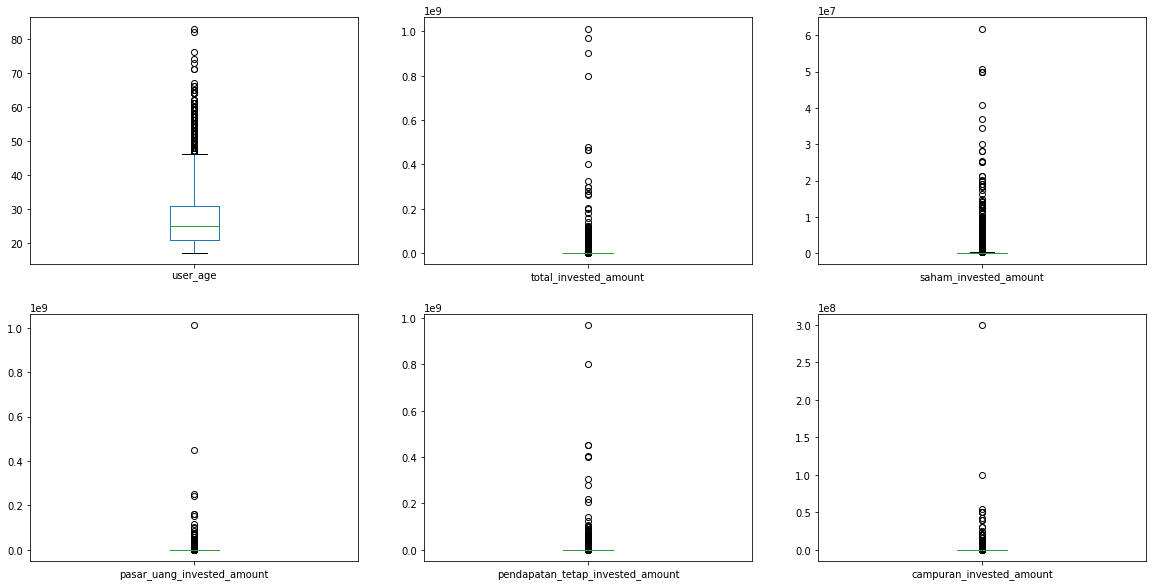

In [ ]:
numerical_column = ['user_age', 'total_invested_amount', 'saham_invested_amount', 'pasar_uang_invested_amount', 'pendapatan_tetap_invested_amount', 'campuran_invested_amount']

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df_merged.boxplot(el, ax=axes.flatten()[i],grid=False) # axes.flatten()[i] untuk ambil ALL AXES dari index i
plt.show()



*   exclude total_invested_amount, pasar_uang_invested_amount, and pendapatan_tetap_invested_amount above 700 million




In [ ]:
df_merged = df_merged[~(df_merged['total_invested_amount']>700000000)]
df_merged = df_merged[~(df_merged['pasar_uang_invested_amount']>700000000)]
df_merged = df_merged[~(df_merged['pendapatan_tetap_invested_amount']>700000000)]

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8273 entries, 0 to 8276
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           8273 non-null   object        
 1   registration_import_datetime      8273 non-null   datetime64[ns]
 2   user_gender                       8273 non-null   object        
 3   user_age                          8273 non-null   int64         
 4   user_occupation                   8273 non-null   object        
 5   user_income_range                 8273 non-null   object        
 6   referral_code_used                8273 non-null   object        
 7   user_income_source                8273 non-null   object        
 8   total_buy_amount                  8273 non-null   int64         
 9   total_sell_amount                 8273 non-null   int64         
 10  user_income_category              8273 non-null 

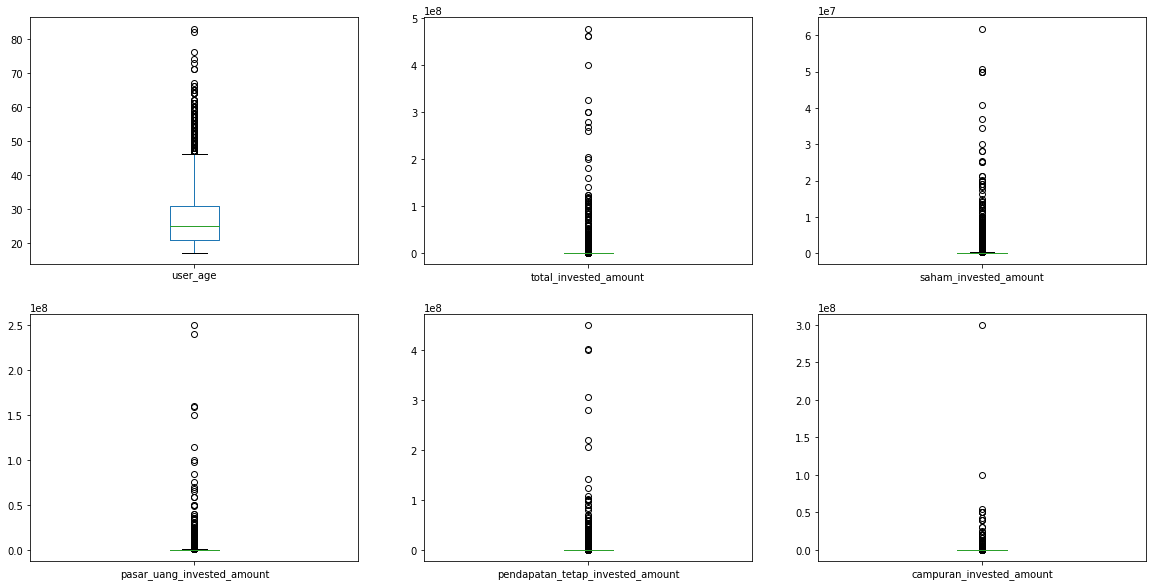

In [ ]:
numerical_column = ['user_age', 'total_invested_amount', 'saham_invested_amount', 'pasar_uang_invested_amount', 'pendapatan_tetap_invested_amount', 'campuran_invested_amount']

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df_merged.boxplot(el, ax=axes.flatten()[i],grid=False) # axes.flatten()[i] untuk ambil ALL AXES dari index i
plt.show()

###The time series data

In [ ]:
df_dut.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0


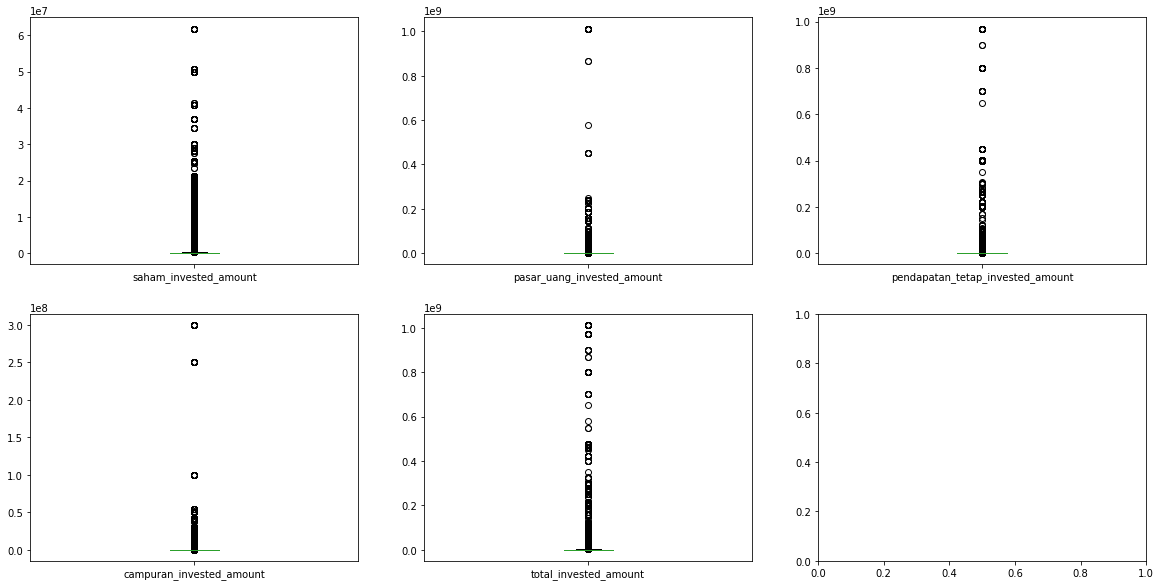

In [ ]:
numerical_column_dut = ['saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount','total_invested_amount']

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column_dut):
    a = df_dut.boxplot(el, ax=axes.flatten()[i],grid=False) # axes.flatten()[i] untuk ambil ALL AXES dari index i
plt.show()

I will no drop the outlier data because there is nothing outlier significant

#D) EDA (Exploratory Data Analysis)


##Descriptive Statistics
*   How many users do we have in the data
*   How is the demographic in the data 
*   How many users buy products in each mutual fund



In [ ]:
df_eda = df_merged.copy()
df_eda.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,total_buy_amount,total_sell_amount,user_income_category,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,100000,0,medium,290000.0,40000.0,270000.0,0.0,600000.0
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,8500000,0,high,8920000.0,1350000.0,3230000.0,0.0,13500000.0
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no referral,Gaji,149000,0,very-low,40000.0,10000.0,50000.0,899000.0,999000.0
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,0,0,very-low,0.0,10000.0,0.0,0.0,10000.0
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,1000000,-1889569,medium,0.0,0.0,110431.0,0.0,110431.0


In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8273 entries, 0 to 8276
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           8273 non-null   object        
 1   registration_import_datetime      8273 non-null   datetime64[ns]
 2   user_gender                       8273 non-null   object        
 3   user_age                          8273 non-null   int64         
 4   user_occupation                   8273 non-null   object        
 5   user_income_range                 8273 non-null   object        
 6   referral_code_used                8273 non-null   object        
 7   user_income_source                8273 non-null   object        
 8   total_buy_amount                  8273 non-null   int64         
 9   total_sell_amount                 8273 non-null   int64         
 10  user_income_category              8273 non-null 

### Descriptive information about numeric variable

In [ ]:
#Descriptive analysis after treating the outlier
pd.set_option('display.float_format', lambda x: '%.3f' % x)

numeric = ['saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount','total_invested_amount']

desc_eda = df_eda[numeric].describe()
desc_eda.loc['kurtosis'] = df_eda[numeric].kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = df_eda[numeric].skew() #show Skewness statistic
desc_eda.loc['variance'] = df_eda[numeric].var() #show variance statistic
desc_eda.round(2)

,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
count,8273.000,8273.000,8273.000,8273.000,8273.000
mean,336610.480,606983.620,993090.720,189665.460,2126350.270
std,2034859.950,6016756.290,11068658.800,3938810.050,15274549.660
min,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000
50%,0.000,10000.000,10000.000,0.000,100000.000
75%,100000.000,100000.000,110000.000,0.000,500000.000
max,61840000.000,250072498.000,450000000.000,300000000.000,478075955.000
kurtosis,349.360,872.200,904.000,4131.600,479.280
skewness,16.300,26.280,27.280,57.430,19.440


Insight



*   Average saham invested are 336,610 usd, the median is 0, minimum is 0 and the maximum after removing outlier are 61,840,000 usd
*   Average pasar uang invested are 606,983 usd, the median is 10,000 usd, minimum is 0 and the maximum after removing outlier are 250,072,498 usd
*   Average pendapatan tetap invested are 993,090 usd, the median is 10,000 usd, minimum is 0 and the maximum after removing outlier are 450,000,000 usd
*   Average campuran invested are 189,665 usd, the median is 0, minimum is 0 and the maximum after removing outlier are 300,000,000 usd
* Pendapatan tetap has the highest average investment



### Descriptive information about object variable

In [ ]:
objects = ['user_id',
 'user_gender',
 'user_occupation',
 'referral_code_used',
 'user_income_source',
 'user_income_category']
df_eda[objects].describe()

,user_id,user_gender,user_occupation,referral_code_used,user_income_source,user_income_category
count,8273,8273,8273,8273,8273,8273
unique,8273,2,9,2,10,4
top,3816789,Male,Pelajar,no referral,Gaji,very-low
freq,1,5174,4473,5319,5139,3526


Insight


*   we have 8273 user
*   The most frequent user gender are males
*   The most frequent user occupation are students
*   Most user do not use a referral
*   The most user income source is from salary
*   The most user income category is very low or in range under 10 million



### Descriptive information about date type variable

In [ ]:
df_eda['registration_import_datetime'].describe()

<ipython-input-74-9de327b2f30c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_eda['registration_import_datetime'].describe()


count                    8273
unique                   6578
top       2021-09-17 14:10:39
freq                        5
first     2021-08-01 00:11:14
last      2021-09-28 13:20:00
Name: registration_import_datetime, dtype: object

Insight:
The registration user data start from 2021-08-01 to 2021-09-28

###Number of user

In [ ]:
df_eda['user_id'].count()

8273

Insight: We have 8273 user in the data

###Demographics Data

In [ ]:
df_occ = df_eda.groupby(['user_occupation'])['user_id'].count().sort_values(ascending=False)
df_occ = df_occ.reset_index()
df_occ.head()

,user_occupation,user_id
0,Pelajar,4473
1,Swasta,1866
2,Others,928
3,IRT,477
4,Pengusaha,323


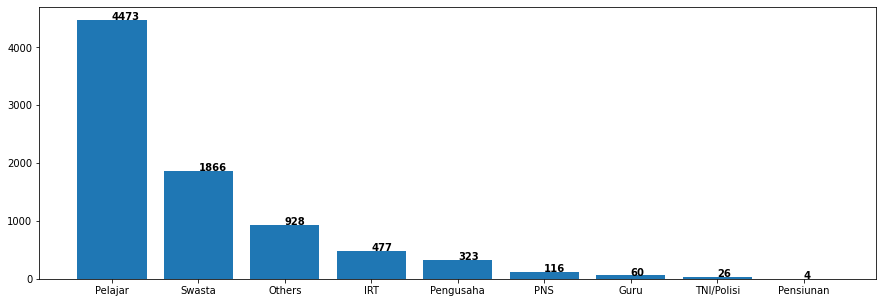

In [ ]:
fig = plt.figure(figsize =(15, 5))

P = df_occ.copy()

P.sort_values('user_id', ascending=False, inplace=True)
x = P['user_occupation']
y = P['user_id']

#Add the data labels
for i, v in enumerate(y):
    vmil = round(v)
    plt.text(i, v, str(vmil), fontweight='bold')

plt.bar(x, y)   #Create the bar chart
plt.show()

Insight

Many users who make investments come from students and the second is private sector employee


In [ ]:
# df_age = df_eda.groupby(['user_age']).agg(['count'])['user_id'].sort_values(by='user_age', ascending = False)
# df_age.head()
df_age = df_eda.groupby(['user_age'])['user_id'].count().sort_values(ascending=False)
df_age = df_age.reset_index()
df_age.head()

,user_age,user_id
0,21,693
1,20,614
2,23,553
3,22,549
4,24,514


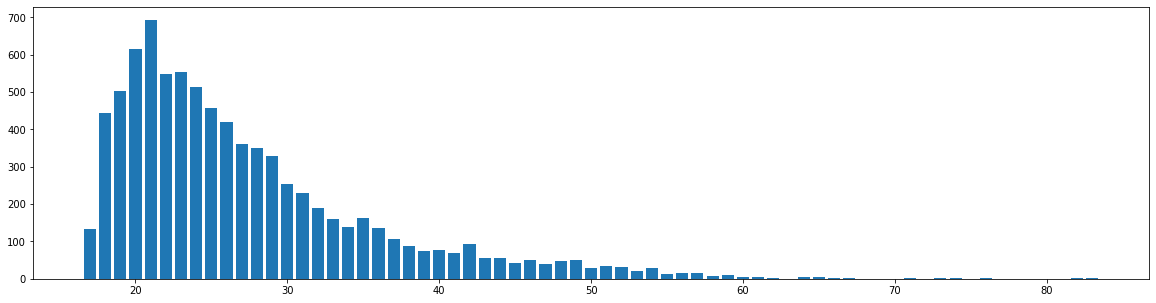

In [ ]:
fig = plt.figure(figsize =(20, 5))

A= df_age.copy()
A.sort_values('user_age', ascending=True, inplace=True)
x = A['user_age']
y = A['user_id']


plt.bar(x, y)   #Create the bar chart
plt.show()

Insight

Users who invest a lot are mostly in productive age (18 until 30 years old)

In [ ]:
df_income = df_eda.groupby(['user_income_source'])['user_id'].count().sort_values(ascending=False)
df_income = df_income.reset_index()
df_income

,user_income_source,user_id
0,Gaji,5139
1,Keuntungan Bisnis,998
2,Undian,928
3,Dari Orang Tua / Anak,507
4,Lainnya,256
5,Tabungan,256
6,Hasil Investasi,90
7,Dari Suami / istri,60
8,Warisan,26
9,Bunga Simpanan,13


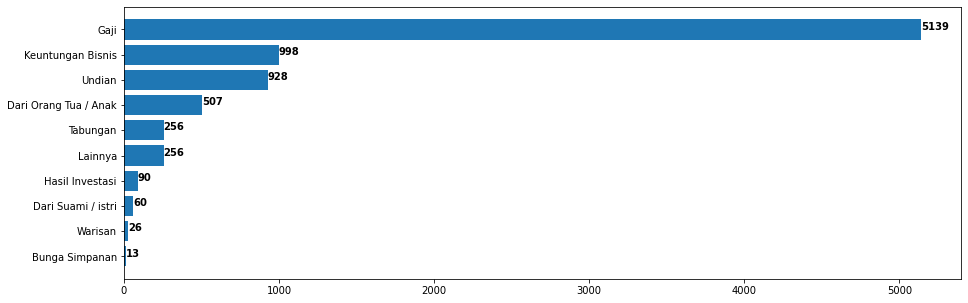

In [ ]:
fig = plt.figure(figsize =(15, 5))    #To create the canvas, figsize is showing size in inches (x,y)

K = df_income.copy()   

K.sort_values('user_id', ascending=True, inplace=True) 
x = K['user_income_source']    #assign the x
y = K['user_id']         #assign the y

plt.barh(x, y)  #Create the horizontal bar chart

#To show the data labels, using for loops
for i, v in enumerate(y):                           #enumerate add numeric besides the data, example = (0, ‘value’)
    vmil = round(v)                                 #round the y
    plt.text(v, i, str(vmil), fontweight='bold')    #add text plt.text(x,y,s,fontweight = '')

plt.show()

In [ ]:
df_income['percentage'] = np.round(df_income['user_id']/df_income['user_id'].sum() * 100,2)   
df_income

,user_income_source,user_id,percentage
0,Gaji,5139,62.120
1,Keuntungan Bisnis,998,12.060
2,Undian,928,11.220
3,Dari Orang Tua / Anak,507,6.130
4,Lainnya,256,3.090
5,Tabungan,256,3.090
6,Hasil Investasi,90,1.090
7,Dari Suami / istri,60,0.730
8,Warisan,26,0.310
9,Bunga Simpanan,13,0.160


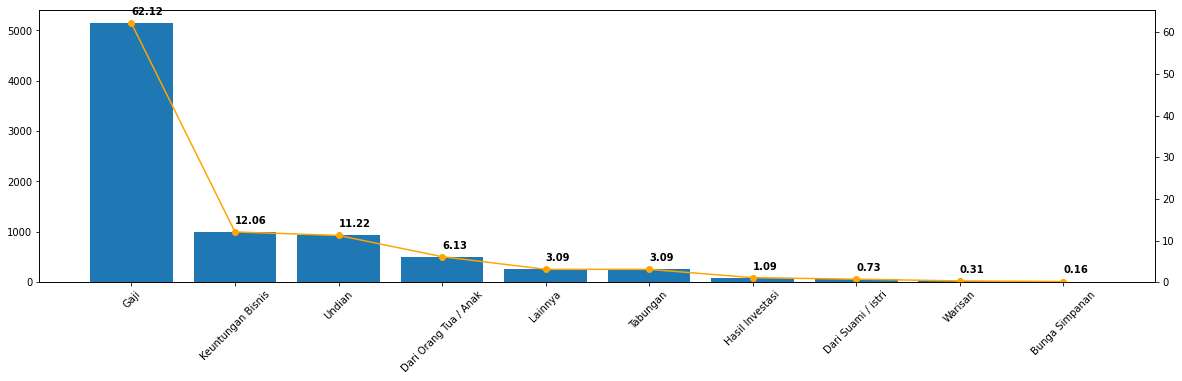

In [ ]:
fig,ax = plt.subplots(figsize=(20, 5))    #To create sub plot

x = df_income['user_income_source']
y_bar = df_income['user_id']
y_line = df_income['percentage']

ax.bar(x,y_bar)   #To create the bar chart

plt.xticks(rotation = 45) 

ax2 = ax.twinx()     #To create combo chart, create twin axis of y, by sharing x axis
ax2.plot(x,y_line, marker = 'o', color = 'orange')   #To create the line chart
ax2.set_ylim(ymin=0)    #To make the line chart start at 0

#To create the data labels
for i, v in enumerate(y_line):                                   
    vmil = round(v,2)
    plt.text(i, v+2, str(vmil), fontweight='bold')

plt.show()

Insight

* The most user income source comes from salary
* The least user income source come from bunga simpanan and warisan

In [ ]:
df_referral = df_eda.groupby('referral_code_used')['user_id'].count()
df_referral = df_referral.reset_index()   #Reset the index to make it into a pandas dataframe
df_referral

,referral_code_used,user_id
0,no referral,5319
1,used referral,2954


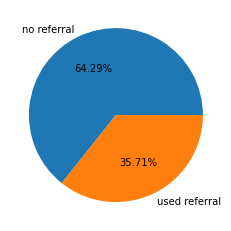

In [ ]:
plt.pie(df_referral['user_id'], labels = df_referral['referral_code_used'], autopct='%.2f%%') #Create a pie chart, autopct='%.2f%%' to show percent and 2 decimal
plt.show()

Insight

Not many users have joined through referrals yet, users have joined with referral just 36%

In [ ]:
df_occ = df_eda.groupby('user_income_category')['user_id'].count()
df_occ = df_occ.reset_index()   #Reset the index to make it into a pandas dataframe
df_occ

,user_income_category,user_id
0,high,700
1,low,2706
2,medium,1341
3,very-low,3526


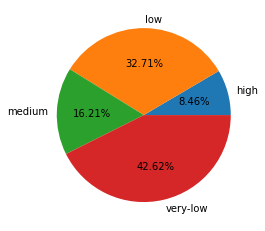

In [ ]:
plt.pie(df_occ['user_id'], labels = df_occ['user_income_category'], autopct='%.2f%%') #Create a pie chart, autopct='%.2f%%' to show percent and 2 decimal
plt.show()

Insight

* The most user income category is very low (income under 10 million)
* The highest user income category comes from very low and low. Its mean the most user income under 50 million

###The user buy product in each mutual fund

In [ ]:
sa = df_eda['saham_invested_amount']
df_eda.loc[(sa == 0), 'saham_transaction'] = 'no transaction'
df_eda.loc[(sa > 0), 'saham_transaction'] = 'transaction'

pu = df_eda['pasar_uang_invested_amount']
df_eda.loc[(pu == 0), 'pasar_uang_transaction'] = 'no transaction'
df_eda.loc[(pu > 0), 'pasar_uang_transaction'] = 'transaction'

pt = df_eda['pendapatan_tetap_invested_amount']
df_eda.loc[(pt == 0), 'pend_tetap_transaction'] = 'no transaction'
df_eda.loc[(pt > 0), 'pend_tetap_transaction'] = 'transaction'

ca = df_eda['campuran_invested_amount']
df_eda.loc[(ca == 0), 'campuran_transaction'] = 'no transaction'
df_eda.loc[(ca > 0), 'campuran_transaction'] = 'transaction'

df_eda

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,total_buy_amount,total_sell_amount,user_income_category,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,saham_transaction,pasar_uang_transaction,pend_tetap_transaction,campuran_transaction
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,100000,0,medium,290000.000,40000.000,270000.000,0.000,600000.000,transaction,transaction,transaction,no transaction
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,8500000,0,high,8920000.000,1350000.000,3230000.000,0.000,13500000.000,transaction,transaction,transaction,no transaction
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no referral,Gaji,149000,0,very-low,40000.000,10000.000,50000.000,899000.000,999000.000,transaction,transaction,transaction,transaction
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,0,0,very-low,0.000,10000.000,0.000,0.000,10000.000,no transaction,transaction,no transaction,no transaction
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,1000000,-1889569,medium,0.000,0.000,110431.000,0.000,110431.000,no transaction,no transaction,transaction,no transaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,2021-08-06 13:10:06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no referral,Lainnya,350000,-450000,high,0.000,0.000,0.000,0.000,0.000,no transaction,no transaction,no transaction,no transaction
8273,3798265,2021-08-09 10:42:53,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,25000,-125000,low,0.000,0.000,0.000,0.000,0.000,no transaction,no transaction,no transaction,no transaction
8274,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,240000,0,medium,210000.000,130000.000,95000.000,0.000,435000.000,transaction,transaction,transaction,no transaction
8275,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no referral,Gaji,150000,-250000,high,0.000,0.000,0.000,0.000,0.000,no transaction,no transaction,no transaction,no transaction


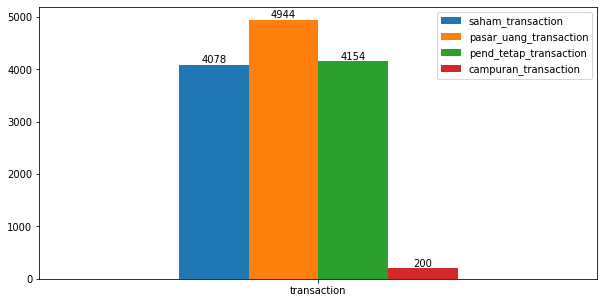

In [ ]:
transaction_bar = df_eda[['user_id','saham_transaction','pasar_uang_transaction','pend_tetap_transaction','campuran_transaction']]

df_filtered_saham_transaction = transaction_bar.loc[transaction_bar['saham_transaction'] == 'transaction']
result_filtered_saham_transaction = df_filtered_saham_transaction.groupby('saham_transaction')['user_id'].count()
result_filtered_saham_transaction.columns = ['saham_transaction', 'user_id']

df_filtered_pasar_uang_transaction = transaction_bar.loc[transaction_bar['pasar_uang_transaction'] == 'transaction']
result_filtered_pasar_uang_transaction = df_filtered_pasar_uang_transaction.groupby('pasar_uang_transaction')['user_id'].count()
result_filtered_pasar_uang_transaction.columns = ['pasar_uang_transaction', 'user_id']

df_filtered_pend_tetap_transaction = transaction_bar.loc[transaction_bar['pend_tetap_transaction'] == 'transaction']
result_filtered_pend_tetap_transaction = df_filtered_pend_tetap_transaction.groupby('pend_tetap_transaction')['user_id'].count()
result_filtered_pend_tetap_transaction.columns = ['pend_tetap_transaction', 'user_id']

df_filtered_campuran_transaction = transaction_bar.loc[transaction_bar['campuran_transaction'] == 'transaction']
result_filtered_campuran_transaction = df_filtered_campuran_transaction.groupby('campuran_transaction')['user_id'].count()
result_filtered_campuran_transaction.columns = ['campuran_transaction', 'user_id']

# Create a dictionary of series
merged_data = {'saham_transaction': result_filtered_saham_transaction, 'pasar_uang_transaction': result_filtered_pasar_uang_transaction, 'pend_tetap_transaction': result_filtered_pend_tetap_transaction, 'campuran_transaction': result_filtered_campuran_transaction}

# Create a dataframe from the dictionary
merged_df = pd.DataFrame(merged_data)

# Print the resulting dataframe
merged_bar = merged_df.plot(kind='bar', width=0.5)

for i in merged_bar.containers:
    merged_bar.bar_label(i, label_type='edge')

fig = merged_bar.figure
fig.set_size_inches(10, 5)

plt.xticks(rotation = 360)

plt.show()

Insight

Most users conduct transactions in money market investments, followed by stock investments and fixed income. Mixed investments are rarely used by users

Recommendation

1. Increase the referral program to encourage more users to join through referrals and provide attractive incentives for users who successfully invite their friends to join.
2. Expand the types of investments offered, especially mixed investments, which are currently rarely used by users. Special promotions can also be carried out for this type of investment to increase user interest.
3. Focus on productive age users in introducing new types of investment, as productive age users tend to have a large amount of investment and will have a significant impact on the amount of investment made by users.
4. Increase promotion of stock investments to attract more users and increase the amount of investment in this type of investment.
5. Increase promotion of fixed income investments to attract more users and increase the amount of investment in this type of investment, as this type of investment is the most popular among users.
6. Provide more diverse investment options for users with higher income categories, such as stock investments, properties, or equity-based mutual funds, as users in this income category have the potential to make larger investments and tend to seek more diverse types of investments.

##Finding pattern



*   There any trend on the transaction
*   Transaction trends for mutual fund



In [ ]:
df_pat = df_dut.copy()

In [ ]:
df_pat.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
1,50701,2021-08-31,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
2,50701,2021-09-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
3,50701,2021-09-02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
4,50701,2021-09-03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000


###Trend Transaction

####Total transaction amount

In [ ]:
df_tran = df_pat.groupby('date')['total_invested_amount'].sum()
df_tran = df_tran.reset_index()   #Reset the index to make it into a pandas dataframe
df_tran.head()

,date,total_invested_amount
0,2021-08-04,54158326.000
1,2021-08-05,128766000.000
2,2021-08-06,286932955.000
3,2021-08-09,543456467.000
4,2021-08-10,490934176.000


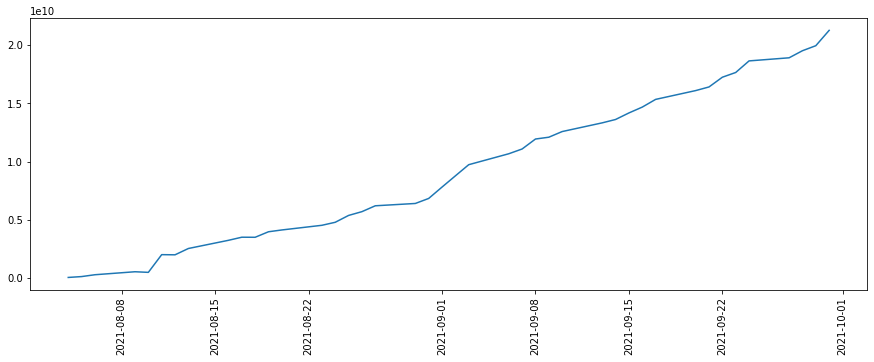

In [ ]:
plt.figure(figsize =(15, 5))

plt.xticks(rotation = 90)
plt.plot(df_tran['date'], df_tran['total_invested_amount'])

plt.show()

####Total user transaction

In [ ]:
# Group by date and count the number of user_ids where total_invested_amount is greater than 0
df_us = df_pat.groupby('date')['user_id'].agg(lambda x: (x[df_pat['total_invested_amount'] > 0]).count())
df_us = df_us.reset_index()   #Reset the index to make it into a pandas dataframe
df_us.head()

,date,user_id
0,2021-08-04,113
1,2021-08-05,198
2,2021-08-06,306
3,2021-08-09,394
4,2021-08-10,529


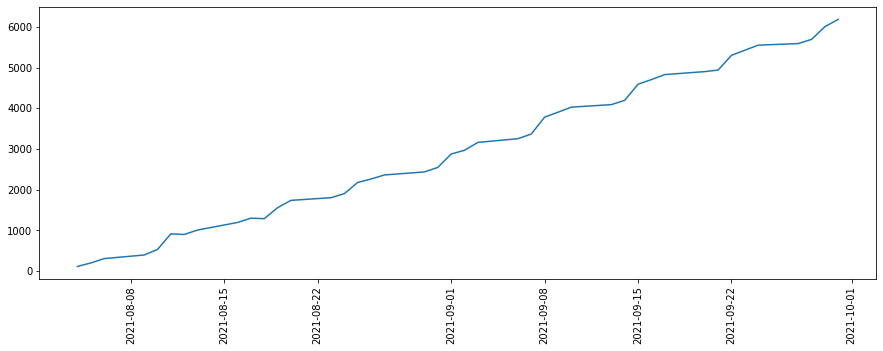

In [ ]:
plt.figure(figsize =(15, 5))

plt.xticks(rotation = 90)
plt.plot(df_us['date'], df_us['user_id'])

plt.show()

Insight
* The trend seems identical, significantly increased
* so it probably that the total invested amount are directly caused by the number of user 

###Transaction trend by mutual fund

####Transaction by mutual fund

In [ ]:
transaction_trend = df_dut[['user_id','date','saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount']]    #Pick variable that wanted to be analyzed
transaction_trend.head()

,user_id,date,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
0,50701,2021-08-30,0.000,0.000,0.000,10000000.000
1,50701,2021-08-31,0.000,0.000,0.000,10000000.000
2,50701,2021-09-01,0.000,0.000,0.000,10000000.000
3,50701,2021-09-02,0.000,0.000,0.000,10000000.000
4,50701,2021-09-03,0.000,0.000,0.000,10000000.000


In [ ]:
transaction_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 6 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   user_id                           158811 non-null  object        
 1   date                              158811 non-null  datetime64[ns]
 2   saham_invested_amount             158811 non-null  float64       
 3   pasar_uang_invested_amount        158811 non-null  float64       
 4   pendapatan_tetap_invested_amount  158811 non-null  float64       
 5   campuran_invested_amount          158811 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 7.3+ MB


In [ ]:
#Change the transaction into a column using pivot
transaction_trend_pivot = transaction_trend.pivot_table(index = 'date',  
                                                        values = ('saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount'))
transaction_trend_pivot = transaction_trend_pivot.reset_index() 
transaction_trend_pivot.head()

,date,campuran_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,saham_invested_amount
0,2021-08-04,94017.094,105897.658,87848.718,175128.205
1,2021-08-05,109313.725,148456.049,216786.108,156650.000
2,2021-08-06,148888.889,270559.190,318908.603,172541.587
3,2021-08-09,201877.934,567919.692,316228.136,189693.643
4,2021-08-10,229116.118,156924.617,295665.834,169132.558


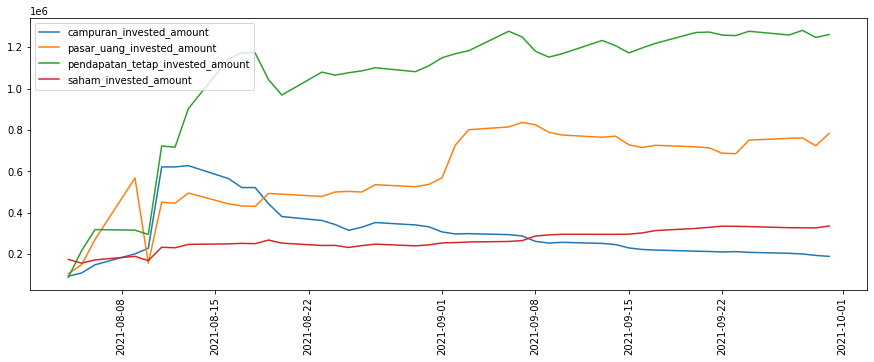

In [ ]:
#Create line chart
plt.figure(figsize =(15, 5))
axis = transaction_trend_pivot.columns.tolist()
#axis.head()

for x in axis[1:]:    
  plt.plot(transaction_trend_pivot['date'], transaction_trend_pivot[x])

plt.xticks(rotation = 90)
plt.legend(transaction_trend_pivot.iloc[:,1:],loc = 2)

plt.show()

Insight


* There is a significant decreasing trend around August 10, 2021
* The largest amount of invested amount is in fixed income
* The lowest invested amount in September is in mixed investments
* The stable investment from August to September is in stocks
* Money market is the second most frequent investment after fixed income



####Transaction by the user

In [ ]:
transaction_user_trend = df_dut[['date','user_id','saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount']].sort_values(by='date')   #Pick variable that wanted to be analyzed
transaction_user_trend.head()

,date,user_id,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
34729,2021-08-04,3739617,50000.000,10000.000,40000.000,0.000
33543,2021-08-04,3737288,0.000,0.000,0.000,2500000.000
34212,2021-08-04,3738819,0.000,0.000,0.000,0.000
4525,2021-08-04,925437,40000.000,10000.000,50000.000,0.000
33048,2021-08-04,3736615,220000.000,20000.000,60000.000,0.000


In [ ]:
saham = transaction_user_trend['saham_invested_amount']
transaction_user_trend.loc[(saham == 0), 'user_saham'] = 'no transaction'
transaction_user_trend.loc[(saham > 0), 'user_saham'] = 'transaction'

df_shm = transaction_user_trend[['date','user_saham']]

# Group by date and count the number of True and False flags
result_saham = df_shm.groupby('date')['user_saham'].value_counts().unstack(fill_value=0)

# Rename columns
result_saham.columns = ['(saham) no transaction', '(saham) transaction']

# Print the result
# result_saham

In [ ]:
pasar_uang = transaction_user_trend['pasar_uang_invested_amount']
transaction_user_trend.loc[(pasar_uang == 0), 'user_pasar_uang'] = 'no transaction'
transaction_user_trend.loc[(pasar_uang > 0), 'user_pasar_uang'] = 'transaction'

df_psu = transaction_user_trend[['date','user_pasar_uang']]
# df_shm.head()

# Group by date and count the number of True and False flags
result_psu = df_psu.groupby('date')['user_pasar_uang'].value_counts().unstack(fill_value=0)

# Rename columns
result_psu.columns = ['(pasar uang) no transaction', '(pasar uang) transaction']

# Print the result
# result_psu

In [ ]:
pendapatan_tetap = transaction_user_trend['pendapatan_tetap_invested_amount']
transaction_user_trend.loc[(pendapatan_tetap == 0), 'user_pendapatan_ttp'] = 'no transaction'
transaction_user_trend.loc[(pendapatan_tetap > 0), 'user_pendapatan_ttp'] = 'transaction'

df_pdptttp = transaction_user_trend[['date','user_pendapatan_ttp']]
# df_shm.head()

# Group by date and count the number of True and False flags
result_pdptttp = df_pdptttp.groupby('date')['user_pendapatan_ttp'].value_counts().unstack(fill_value=0)

# Rename columns
result_pdptttp.columns = ['(pendapatan ttp) no transaction', '(pendapatan ttp) transaction']

# Print the result
# result_pdptttp

In [ ]:
campuran = transaction_user_trend['campuran_invested_amount']
transaction_user_trend.loc[(campuran == 0), 'user_campuran'] = 'no transaction'
transaction_user_trend.loc[(campuran > 0), 'user_campuran'] = 'transaction'

df_campuran = transaction_user_trend[['date','user_campuran']]
# df_shm.head()

# Group by date and count the number of True and False flags
result_campuran = df_campuran.groupby('date')['user_campuran'].value_counts().unstack(fill_value=0)

# Rename columns
result_campuran.columns = ['(campuran) no transaction', '(campuran) transaction']

# result_campuran

In [ ]:
result = pd.merge(result_saham, result_psu, on='date', how='left')
result = pd.merge(result, result_pdptttp, on='date', how='left')
result = pd.merge(result, result_campuran, on='date', how='left').reset_index()
# result

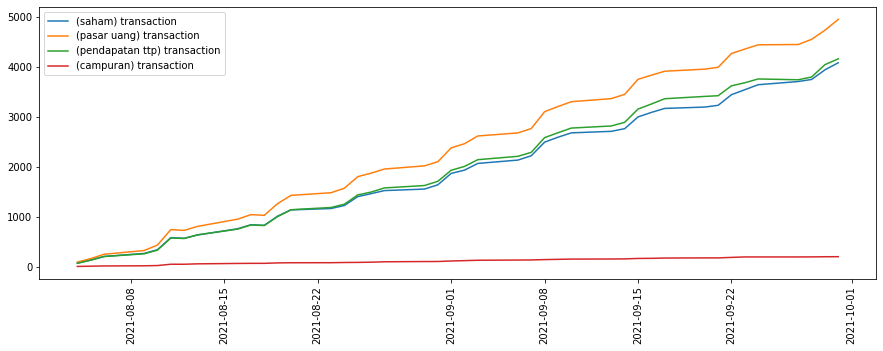

In [ ]:
transaction_graph = result[['date','(saham) transaction','(pasar uang) transaction','(pendapatan ttp) transaction','(campuran) transaction']]
# transaction_graph.head()

#Create line chart
plt.figure(figsize =(15, 5))
axis = transaction_graph.columns.tolist()
#axis.head()

for x in axis[1:]:    
  plt.plot(transaction_graph['date'], transaction_graph[x])

plt.xticks(rotation = 90)
plt.legend(transaction_graph.iloc[:,1:],loc = 2)

plt.show()

Insight

* The most frequent users are in money market investments, followed by fixed income investments and then stock investments
* The least frequent users are in mixed investments
* Looking at the transaction trend by mutual fund, the investment amount that is stable and tends not to increase significantly is in stocks, but the trend of the number of users is significantly increasing. It can be said that users who invest in stocks do not do so in large numbers
* Looking at the transaction trend by mutual fund, the largest investment amount is in fixed income. The trend of the number of users in this investment type is the second most frequent after money market, and the number of users is also increasing daily. It can be said that users who influence the investment amount and invest in large amounts are investing in fixed income

Recommendation

1. Encourage users to explore mixed investments, as it is currently the least used investment type.

2. Educate users about the potential benefits of investing in stocks and encourage them to invest in this asset class, as the number of users investing in stocks is increasing significantly.

3. Encourage users to continue investing in fixed income, as it currently has the largest investment amount and the number of users investing in this asset class is also increasing.

4. Monitor the decreasing trend around August 10, 2021, to identify the cause and take appropriate actions if necessary.

5. Analyze the investment behavior of users who invest in large amounts and explore ways to attract more of such users to invest in mutual funds

#E) Cluster Analysis

In [ ]:
df_cluster = df_merged.copy()
df_cluster.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,total_buy_amount,total_sell_amount,user_income_category,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,100000,0,medium,290000.000,40000.000,270000.000,0.000,600000.000
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,8500000,0,high,8920000.000,1350000.000,3230000.000,0.000,13500000.000
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no referral,Gaji,149000,0,very-low,40000.000,10000.000,50000.000,899000.000,999000.000
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,0,0,very-low,0.000,10000.000,0.000,0.000,10000.000
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,1000000,-1889569,medium,0.000,0.000,110431.000,0.000,110431.000


##Label Encoding

In [ ]:
# change data  user_income_category string to numeric ( label encoding)

df_cluster['user_income_category'] = df_cluster['user_income_category'].astype('category')
df_cluster['Income_category_Encoding'] = df_cluster['user_income_category'].cat.codes
df_cluster

# Replace label 0 with label 3
df_cluster['Income_category_Encoding'] = df_cluster['Income_category_Encoding'].replace({3:0, 0:3})

# check label encoding
sample = pd.DataFrame(df_cluster.groupby(['user_income_category','Income_category_Encoding'])['user_id'].count()).sort_values(by='Income_category_Encoding')
sample[sample['user_id']>0]




,,user_id
user_income_category,Income_category_Encoding,
very-low,0,3526
low,1,2706
medium,2,1341
high,3,700


In [ ]:
df_segmentation = df_cluster.copy()
df_segmentation.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,total_buy_amount,total_sell_amount,user_income_category,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,Income_category_Encoding
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,100000,0,medium,290000.000,40000.000,270000.000,0.000,600000.000,2
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,8500000,0,high,8920000.000,1350000.000,3230000.000,0.000,13500000.000,3
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no referral,Gaji,149000,0,very-low,40000.000,10000.000,50000.000,899000.000,999000.000,0
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,0,0,very-low,0.000,10000.000,0.000,0.000,10000.000,0
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,1000000,-1889569,medium,0.000,0.000,110431.000,0.000,110431.000,2


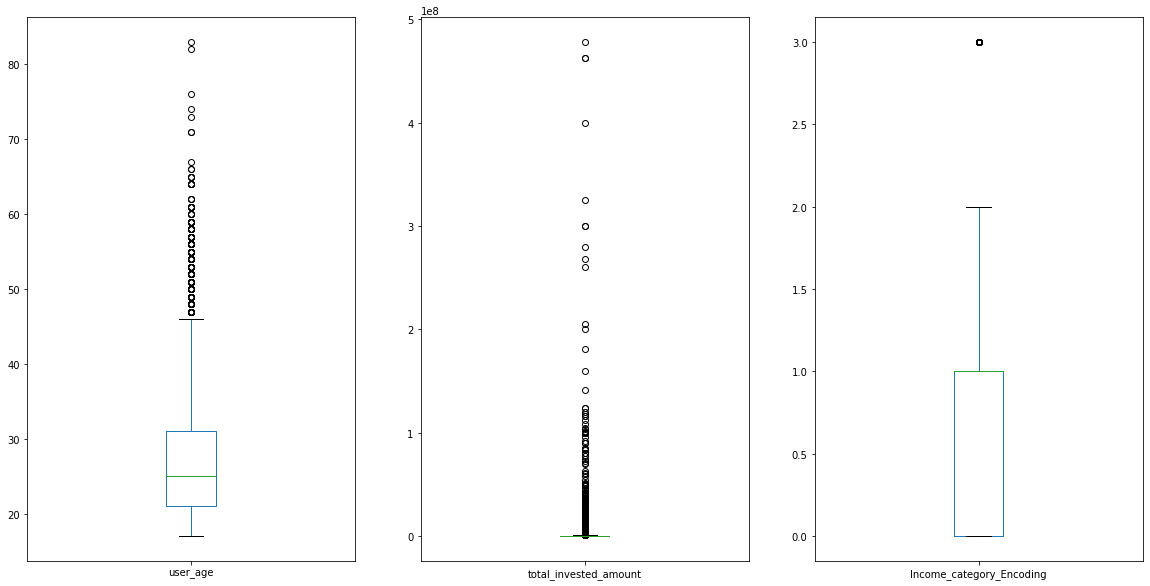

In [ ]:
# filter numeric column
feature = ['user_age', 'total_invested_amount','Income_category_Encoding']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))

for i,el in enumerate(feature):
    a = df_segmentation.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

##Libraries

In [ ]:
# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs                                        # Generate isotropic Gaussian blobs for clustering
from mpl_toolkits.mplot3d import Axes3D                                        # Visualize in 3D
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans

In [ ]:
#df_segmentation_feature is selecting the columns to be used for clustering
df_segmentation_feature = df_segmentation[['user_id','user_age', 'total_invested_amount','Income_category_Encoding']]
df_segmentation_feature

,user_id,user_age,total_invested_amount,Income_category_Encoding
0,3816789,53,600000.000,2
1,3802293,47,13500000.000,3
2,3049927,53,999000.000,0
3,3836491,59,10000.000,0
4,3783302,57,110431.000,2
...,...,...,...,...
8272,3773859,49,0.000,3
8273,3798265,49,0.000,1
8274,3670811,49,435000.000,2
8275,3812221,49,0.000,3


##Standart Scale

In [ ]:
# Define Standard Scale dataset
ss_scale_df = df_segmentation_feature.copy()
column = ['user_age','total_invested_amount']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

In [ ]:
ss_scale_df.head()

,user_id,user_age,total_invested_amount,Income_category_Encoding
0,3816789,3.011,-0.100,2
1,3802293,2.310,0.745,3
2,3049927,3.011,-0.074,0
3,3836491,3.712,-0.139,0
4,3783302,3.478,-0.132,2


##Cluster

###Elbow Method

In [ ]:
# # K-Means Clustering
# distortions = []
# K = range(1,11)
# for k in K:
#     kmeanModel = KMeans(n_clusters=k,init='k-means++')
#     kmeanModel.fit(ss_scale_df) 
#     distortions.append(kmeanModel.inertia_)

# plt.figure(figsize=(16,8))
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()
# print(distortions)

###Silhouette Analysis

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4,5]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.48197187334746894


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.486865713276678


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5103441941507029


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.5106071125760424


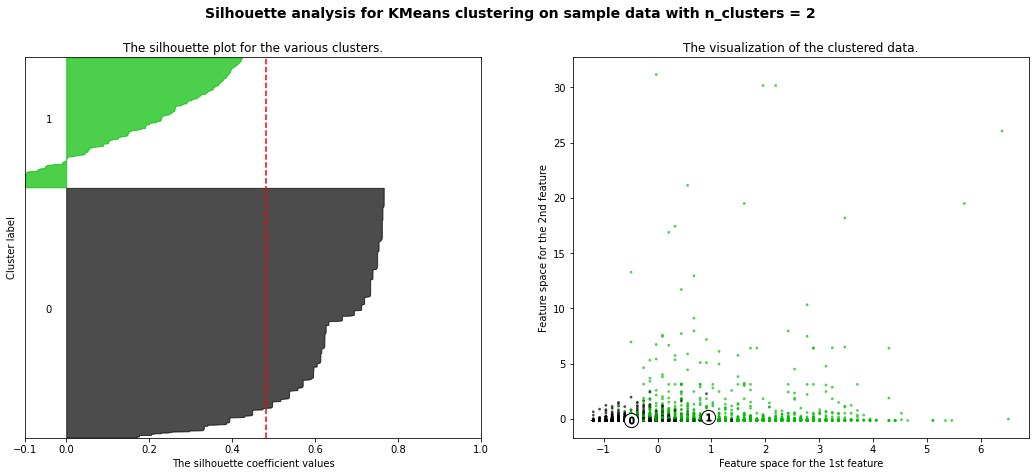

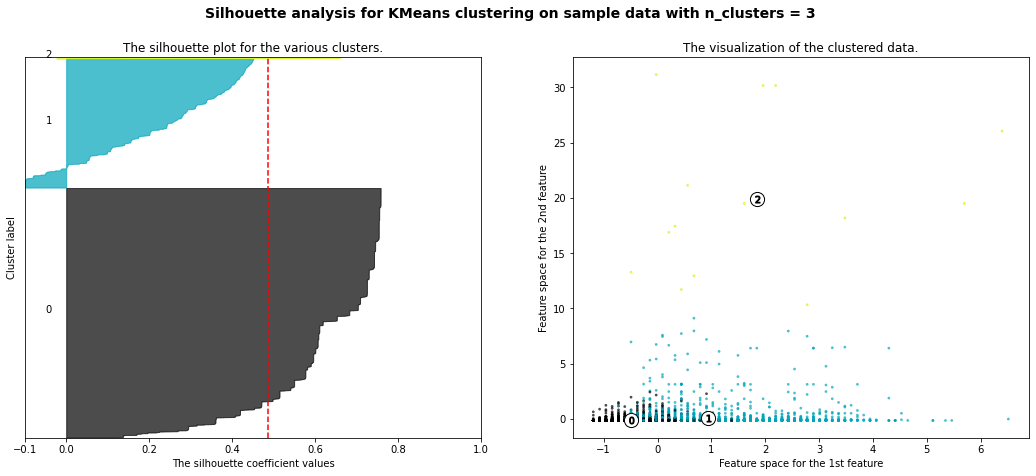

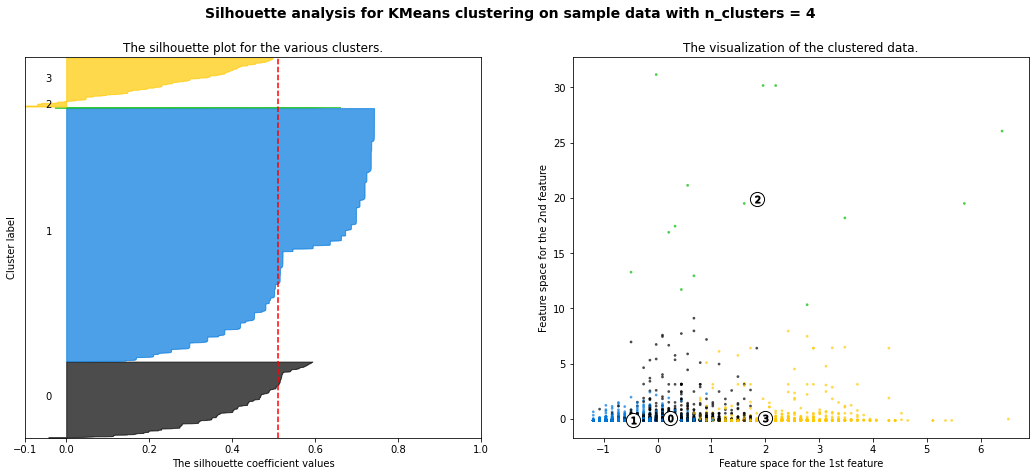

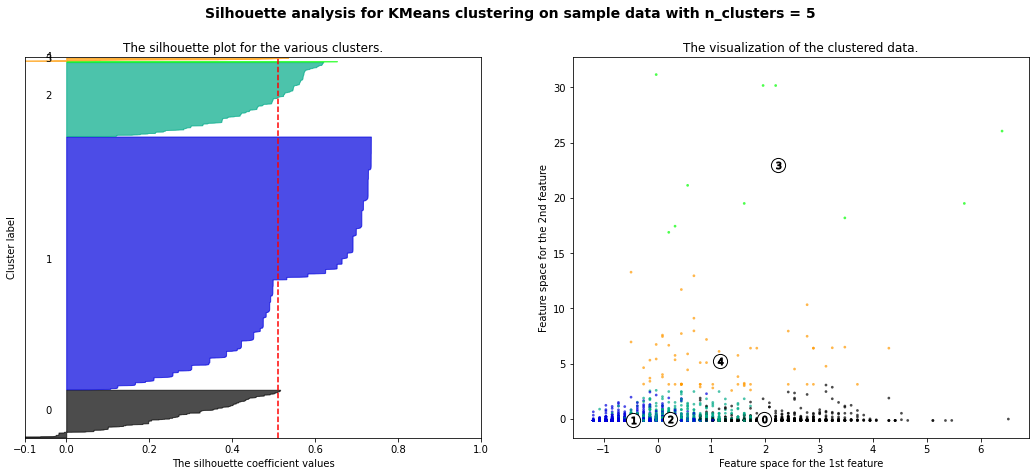

In [ ]:
silhoutte_analysis(ss_scale_df[['user_age','total_invested_amount','Income_category_Encoding']],list(range(2,6)))  

##Segmentation

###Cluster 4

In [ ]:
# make cluster
Cluster_4 = ss_scale_df.copy()

#Creating a clustering model with K Means
cluster_model = KMeans(n_clusters=4)  
cluster_model.fit_predict(Cluster_4[['user_age','total_invested_amount','Income_category_Encoding']]) #apply model to dataframe
Cluster_4['cluster'] = cluster_model.labels_    #add cluster columns
Cluster_4.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,user_age,total_invested_amount,Income_category_Encoding,cluster
0,3816789,3.011,-0.100,2,1
1,3802293,2.310,0.745,3,1
2,3049927,3.011,-0.074,0,1
3,3836491,3.712,-0.139,0,1
4,3783302,3.478,-0.132,2,1


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


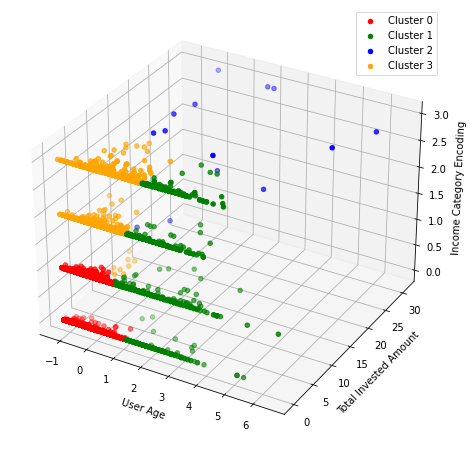

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue', 'orange']

# define the number of clusters and set the random_state parameter
kmeans = KMeans(n_clusters=4, random_state=42)

# fit the model on the data
kmeans.fit(Cluster_4[['user_age', 'total_invested_amount', 'Income_category_Encoding']])

# predict the clusters for each data point
Cluster_4['cluster'] = kmeans.predict(Cluster_4[['user_age', 'total_invested_amount', 'Income_category_Encoding']])

# sort the data by cluster column
Cluster_4_sorted = Cluster_4.sort_values('cluster')

for i in range(4):
    cluster_data = Cluster_4_sorted[Cluster_4_sorted['cluster']==i]
    ax.scatter(cluster_data['user_age'], cluster_data['total_invested_amount'], cluster_data['Income_category_Encoding'], c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('User Age')
ax.set_ylabel('Total Invested Amount')
ax.set_zlabel('Income Category Encoding')
ax.legend()

plt.show()


###Cluster 5

In [ ]:
# make cluster
Cluster_5 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=5) 
cluster_model.fit_predict(Cluster_5[['user_age','total_invested_amount','Income_category_Encoding']]) #apply model to dataframe
Cluster_5['cluster'] = cluster_model.labels_   
Cluster_5.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,user_age,total_invested_amount,Income_category_Encoding,cluster
0,3816789,3.011,-0.100,2,3
1,3802293,2.310,0.745,3,0
2,3049927,3.011,-0.074,0,3
3,3836491,3.712,-0.139,0,3
4,3783302,3.478,-0.132,2,3


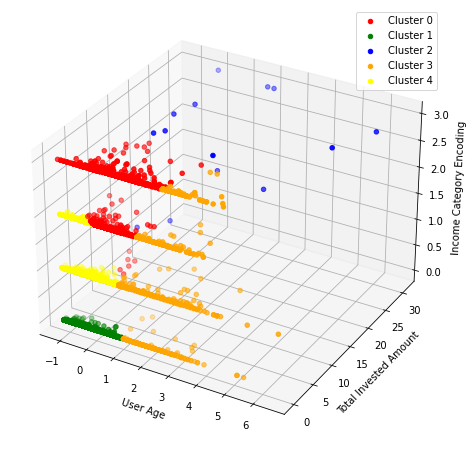

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue', 'orange', 'yellow']

for i in range(5):
    cluster_data = Cluster_5[Cluster_5['cluster']==i]
    ax.scatter(cluster_data['user_age'], cluster_data['total_invested_amount'], cluster_data['Income_category_Encoding'], c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('User Age')
ax.set_ylabel('Total Invested Amount')
ax.set_zlabel('Income Category Encoding')
ax.legend()

plt.show()


from 4 and 5 cluster, I choose to using 4 clusters because the silhouette score is good at 0.5103 and the data distribution is also good. 

##Merge data cluster with data cleaned

In [ ]:
df_segmented = Cluster_4.merge(df_segmentation,how= 'inner', on = 'user_id')
df_segmented.columns
df_segmented['Income_category_Encoding_y'].unique()

array([2, 3, 0, 1])

##Visualize Data

###Data Distribution

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


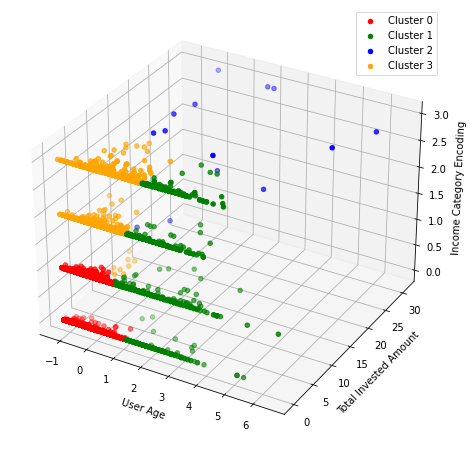

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue', 'orange']

from sklearn.cluster import KMeans

# define the number of clusters and set the random_state parameter
kmeans = KMeans(n_clusters=4, random_state=42)

# fit the model on the data
kmeans.fit(Cluster_4[['user_age', 'total_invested_amount', 'Income_category_Encoding']])

# predict the clusters for each data point
Cluster_4['cluster'] = kmeans.predict(Cluster_4[['user_age', 'total_invested_amount', 'Income_category_Encoding']])

# sort the data by cluster column
Cluster_4_sorted = Cluster_4.sort_values('cluster')

for i in range(4):
    cluster_data = Cluster_4_sorted[Cluster_4_sorted['cluster']==i]
    ax.scatter(cluster_data['user_age'], cluster_data['total_invested_amount'], cluster_data['Income_category_Encoding'], c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('User Age')
ax.set_ylabel('Total Invested Amount')
ax.set_zlabel('Income Category Encoding')
ax.legend()

plt.show()


The criteria for the clusters used:

* 0: Young age, small investment, and low income.
* 1: Young age, medium to low investment, and medium to high income.
* 2: Older age, medium to low investment, and low to high income.
* 3: Young age, large investment, and high income.


###Descriptive Statistics

####Desciptive Information about Numeric variable

In [ ]:
df_segmented.groupby('cluster',as_index = False)[['user_age_y','total_invested_amount_y','Income_category_Encoding_y','saham_invested_amount',
       'pasar_uang_invested_amount', 'pendapatan_tetap_invested_amount',
       'campuran_invested_amount']].agg(['count','mean','min','max','median']).T

cluster                                            0             1  \
user_age_y                       count      5534.000      1067.000   
                                 mean         23.296        44.240   
                                 min          17.000        33.000   
                                 max          36.000        83.000   
                                 median       22.000        43.000   
total_invested_amount_y          count      5534.000      1067.000   
                                 mean     556135.693   3271961.392   
                                 min           0.000         0.000   
                                 max    39219402.000 123600000.000   
                                 median   100000.000    200000.000   
Income_category_Encoding_y       count      5534.000      1067.000   
                                 mean          0.399         1.306   
                                 min           0.000         0.000   
                                 max           1.000         3.000   
                                 median        0.000         1.000   
saham_invested_amount            count      5534.000      1067.000   
                                 mean     117811.813    687822.015   
                                 min           0.000         0.000   
                                 max    16370000.000  61840000.000   
                                 median        0.000     40000.000   
pasar_uang_invested_amount       count      5534.000      1067.000   
                                 mean     203364.936    727027.997   
                                 min           0.000         0.000   
                                 max    37004500.000  75000000.000   
                                 median    10000.000     10000.000   
pendapatan_tetap_invested_amount count      5534.000      1067.000   
                                 mean     197825.568   1571382.667   
                                 min           0.000         0.000   
                                 max    28777387.000 123540000.000   
                                 median        0.000     50000.000   
campuran_invested_amount         count      5534.000      1067.000   
                                 mean      37133.376    285728.712   
                                 min           0.000         0.000   
                                 max    30000000.000  50000000.000   
                                 median        0.000         0.000   

cluster                                             2             3  
user_age_y                       count         14.000      1658.000  
                                 mean          43.000        29.206  
                                 min           23.000        17.000  
                                 max           82.000        43.000  
                                 median        37.000        29.000  
total_invested_amount_y          count         14.000      1658.000  
                                 mean   305977476.571   4064398.883  
                                 min    160000000.000         0.000  
                                 max    478075955.000 141415900.000  
                                 median 290000000.000    400000.000  
Income_category_Encoding_y       count         14.000      1658.000  
                                 mean           2.571         2.324  
                                 min            1.000         1.000  
                                 max            3.000         3.000  
                                 median         3.000         2.000  
saham_invested_amount            count         14.000      1658.000  
                                 mean     7120000.000    783607.848  
                                 min            0.000         0.000  
                                 max     50000000.000  50000000.000  
                                 median         0.000     50000.000  
pasar_uan

* The largest amount of data is in cluster 0, which has 5534 users. 
* The smallest amount of data is in cluster 2, with only 14 users. 
* The highest total investment is in cluster 2, while the lowest total investment is in cluster 0. 
* The highest average investment per mutual fund is in cluster 2, while the lowest average investment per mutual fund is in cluster 0. 
* The average age of users 30 years old or younger is in cluster 0 and 3, while the average age of users over 30 years old is in cluster 1 and 2.

####Desciptive Information about Object variable

In [ ]:
df_segmented.groupby('cluster',as_index = False)[['user_gender','user_occupation','user_income_source','user_income_category']].describe().T

0       1                  2        3
user_gender          count       5534    1067                 14     1658
                     unique         2       2                  2        2
                     top         Male    Male               Male     Male
                     freq        3556     614                  8      996
user_occupation      count       5534    1067                 14     1658
                     unique         8       9                  4        8
                     top      Pelajar  Swasta          Pengusaha  Pelajar
                     freq        3822     545                  6      639
user_income_source   count       5534    1067                 14     1658
                     unique        10      10                  6        9
                     top         Gaji    Gaji  Keuntungan Bisnis     Gaji
                     freq        3131     671                  6     1333
user_income_category count       5534    1067                 14     1658
                     unique         2       4                  3        3
                     top     very-low     low               high   medium
                     freq        3328     490                 10     1105

* Each cluster is dominated by males.
* Clusters 0 and 3 have many users who are students.
* Users in cluster 1 are dominated by private sector workers.
* Users in cluster 2 are dominated by entrepreneurs.
* Sources of income for users in clusters 0, 1, and 3 come from salaries, while * for cluster 2, it comes from business profits.
* Cluster 0 is dominated by users with an income category below 10 million.
* Cluster 1 is dominated by users with an income below 50 million.
* Cluster 2 is dominated by users with an income above 100 million.
* Cluster 3 is dominated by users with an income below 100 million.


###Cluster Demographics

####Median User age per Cluster

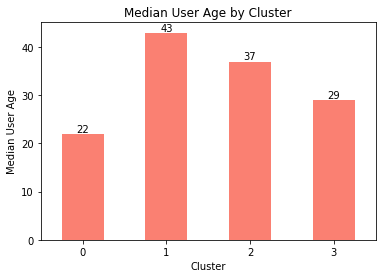

In [ ]:
# group the data by cluster and calculate the median user age
age_by_cluster = df_segmented.groupby('cluster')['user_age_y'].median()

# create a bar chart of the median user age by cluster
ax = age_by_cluster.plot.bar(xlabel='Cluster', ylabel='Median User Age', rot=0, color='salmon')

for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# add a title
ax.set_title('Median User Age by Cluster')


# show the plot
plt.show()


* The median age of users in cluster 0 is 22
* The median age of users in cluster 1 is 43
* The median age of users in cluster 2 is 37
* The median age of users in cluster 3 is 29

####Most User Gender per Cluster 

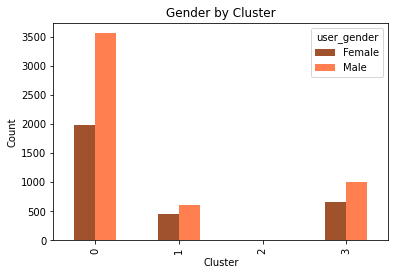

In [ ]:
# group the data by cluster and count of user gender
gender_by_cluster = df_segmented.groupby(['cluster','user_gender'], as_index = False)['user_id'].count().sort_values(by=['cluster','user_id'])
# gender_by_cluster

# pivot the table to make it easier to plot as a bar chart
gender_by_cluster_pivot = gender_by_cluster.pivot(index='cluster', columns='user_gender', values='user_id')

# create a bar chart with stacked bars
gender_by_cluster_pivot.plot(kind='bar', stacked=False, color=['sienna', 'coral'])

# set the chart title and axis labels
plt.title('Gender by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

# show the chart
plt.show()

* Clusters 0, 1, and 3 are dominated by male users
* Clusters  2 are dominated by female users

####Most User Occupation per Cluster 

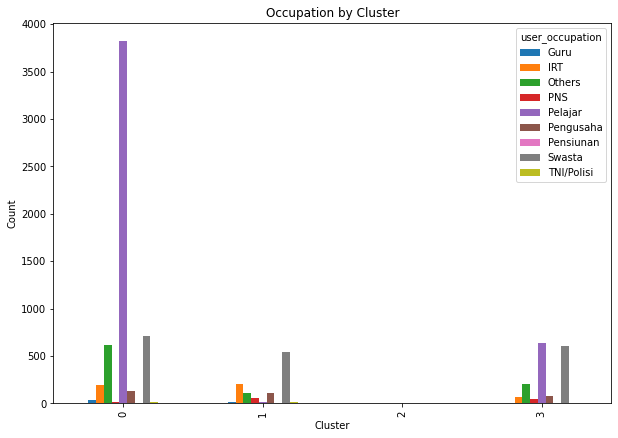

In [ ]:
# group the data by cluster and count user occupation
occupation_by_cluster = df_segmented.groupby(['cluster','user_occupation'], as_index = False)['user_id'].count().sort_values(by=['cluster','user_id'])
# occupation_by_cluster

# pivot the table to make it easier to plot as a bar chart
occupation_by_cluster_pivot = occupation_by_cluster.pivot(index='cluster', columns='user_occupation', values='user_id')

# create a bar chart with stacked bars
ax = occupation_by_cluster_pivot.plot(kind='bar', stacked=False, figsize = (10,7))

# set the chart title and axis labels
plt.title('Occupation by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

# show the chart
plt.show()

* Most users in cluster 0 and 3 work as students
* Most users in cluster 2 work as private entrepreneurs
*  Most users in cluster 1 work as employees

####Most User Income Source per Cluster 

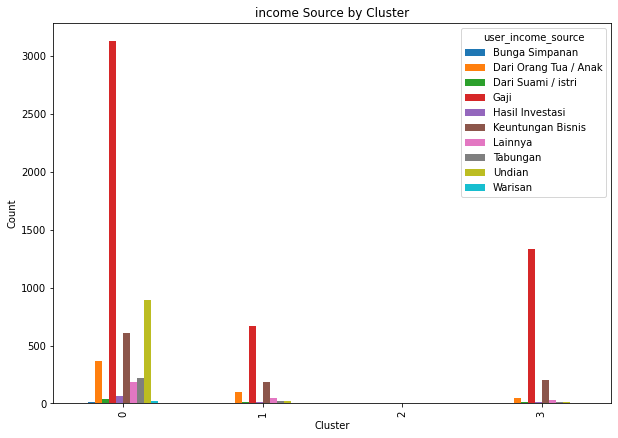

In [ ]:
# group the data by cluster and count income source
income_by_cluster = df_segmented.groupby(['cluster','user_income_source'], as_index = False)['user_id'].count().sort_values(by=['cluster','user_id'])
# income_by_cluster

# pivot the table to make it easier to plot as a bar chart
income_by_cluster_pivot = income_by_cluster.pivot(index='cluster', columns='user_income_source', values='user_id')

# create a bar chart with stacked bars
ax = income_by_cluster_pivot.plot(kind='bar', stacked=False, figsize = (10,7))

# set the chart title and axis labels
plt.title('income Source by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

# show the chart
plt.show()

* Most income source in cluster 0, 1, and 3 is from salaries
* Most income source in cluster 2 is from business profit

####Most User Income Category per Cluster 

In [ ]:
# group the data by cluster and count income category
income_cat_by_cluster = df_segmented.groupby(['cluster','Income_category_Encoding_y'], as_index = False)['user_id'].count().sort_values(by=['cluster','user_id'])
# income_cat_by_cluster


In [ ]:
# pivot the table to make it easier to plot as a bar chart
income_cat_by_cluster_pivot = income_cat_by_cluster.pivot(index='cluster', columns='Income_category_Encoding_y', values='user_id')
income_cat_by_cluster_pivot



Income_category_Encoding_y,0,1,2,3
cluster,,,,
0,3328.000,2206.000,NaN,NaN
1,198.000,490.000,234.000,145.000
2,NaN,2.000,2.000,10.000
3,NaN,8.000,1105.000,545.000


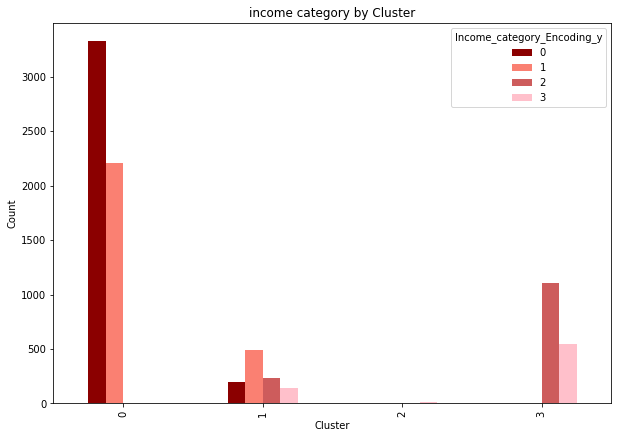

In [ ]:
# create a bar chart 
ax = income_cat_by_cluster_pivot.plot(kind='bar', stacked=False, figsize = (10,7), color=['darkred','salmon','indianred','pink'])

# set the chart title and axis labels
plt.title('income category by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

# show the chart
plt.show()

* The income of users in cluster 0 is in category 0 and 1
* The income of users in cluster 1 is in category 0,1,2, and 3
* The income of users in cluster 2 is dominated by category 3
* The income of users in cluster 3 is dominated by categories 2 and 3

####Mean Total Invested Amount by Cluster

In [ ]:
# group the data by cluster and calculate the mean total invested
total_invested_by_cluster = df_segmented.groupby(['cluster'])['total_invested_amount_y'].mean()
total_invested_by_cluster

cluster
0      556135.693
1     3271961.392
2   305977476.571
3     4064398.883
Name: total_invested_amount_y, dtype: float64

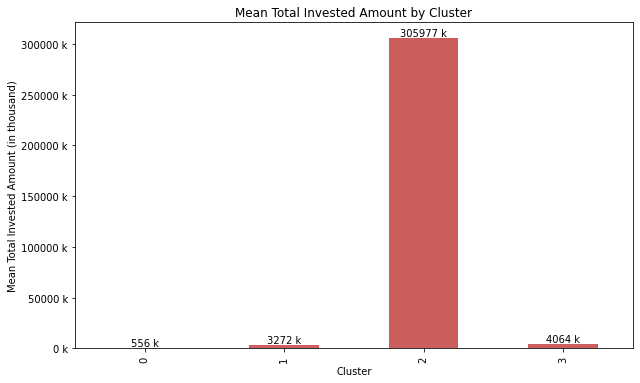

In [ ]:
import matplotlib.ticker as mtick
# create a function to format the labels
def thousand_format(x, pos):
    return '{:.0f} k'.format(x/1000)

# create a bar chart
a = total_invested_by_cluster.plot(kind='bar', figsize=(10,6), color='indianred')

# set chart title and axis labels
plt.title('Mean Total Invested Amount by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Total Invested Amount (in thousand)')

# add labels to each bar
for i in a.containers:
    a.bar_label(i, label_type='edge', fontsize=10, 
                 labels=[f"{thousand_format(val, None)}" for val in i.datavalues])

# format the y-axis labels to show millions
formatter = mtick.FuncFormatter(thousand_format)
a.yaxis.set_major_formatter(formatter)

# show the chart
plt.show()

The highest average total investment is in cluster 2

####Mean Mutual fund per Cluster

In [ ]:
mutual_fund_by_cluster = df_segmented.groupby(['cluster'])['saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount'].mean()
mutual_fund_by_cluster

<ipython-input-135-30bb4bcd3da0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mutual_fund_by_cluster = df_segmented.groupby(['cluster'])['saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount'].mean()


,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
cluster,,,,
0,117811.813,203364.936,197825.568,37133.376
1,687822.015,727027.997,1571382.667,285728.712
2,7120000.000,83205419.571,190848735.571,24803321.429
3,783607.848,1179456.666,1672210.611,429123.758


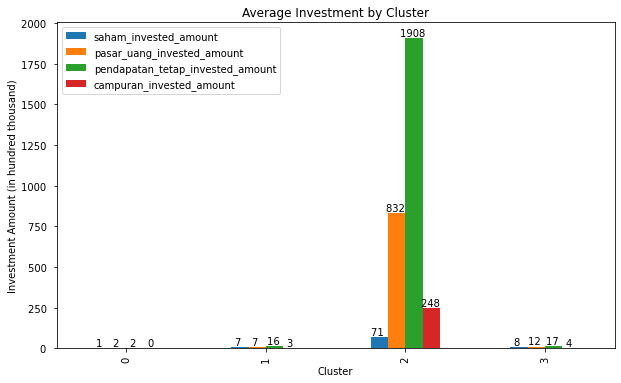

In [ ]:
# create a function to format the labels
def millions_format(x, pos):
    return '{:.0f} '.format(x/100000)

# create a bar chart
ax = mutual_fund_by_cluster.plot(kind='bar', figsize=(10,6))

# set chart title and axis labels
plt.title('Average Investment by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Investment Amount (in hundred thousand)')

# add labels to each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, 
                 labels=[f"{millions_format(val, None)}" for val in i.datavalues])

# format the y-axis labels to show millions
formatter = mtick.FuncFormatter(millions_format)
ax.yaxis.set_major_formatter(formatter)

# show the chart
plt.show()


The largest investment in mutual funds in each cluster is in pendapatan_tetap_invested_amount

##Recommendation

1. For cluster 0 and 3, campaigns related to investment education for students 
could be effective, as they make up a large portion of these clusters.
2. For cluster 1, campaigns related to investment opportunities and benefits for private sector workers could be effective, as they make up a large portion of this cluster.
3. For cluster 2, campaigns related to investment opportunities for entrepreneurs and the benefits of diversifying their income could be effective, as they make up a large portion of this cluster.
4. Campaigns promoting investment products with low investment thresholds could be effective for cluster 0, as they are dominated by users with an income category below 10 million.
5. For cluster 2, campaigns promoting investment products with high returns and high risk could be effective, as they are dominated by users with high income levels.
6. The campaigns should also consider targeting male users, as they dominate all clusters.
7. Finally, campaigns could also focus on increasing user engagement with investment products and educating them on the potential benefits of long-term investment strategies.
